# More with R

**By [Ryan Menezes](https://twitter.com/ryanvmenezes) (Los Angeles Times) & [Christine Zhang](https://twitter.com/christinezhang) (Knight-Mozilla / Los Angeles Times)**

*IRE conference -- New Orleans, LA*  
 
June 18, 2016  

This workshop is a continuation of our previous session, [Getting Started with R](Getting%20started%20with%20R.ipynb)

To recap, in Getting Started with R, we cleaned and merged two census datasets from with some demographic information on Louisiana for the years 2000 and 2010, with a view toward understanding population changes pre- and post- Hurricane Katrina, which took place in August 2005.

As in our last session, we will use this [Times-Picayune](http://www.nola.com/politics/index.ssf/2011/02/new_orleans_officials_2010_pop.html) article as the inspiration for our analysis.

** In this session, we will: **

* Use scatterplots and histograms to better see trends in our data
* Query our data for insights we could write about
* Group our data to perform aggregate calculations
* Use R's built-in regression tools to visualize trendlines

** Here are some questions we will set out to answer: **

* How many census tracts in New Orleans had fewer people in 2010 than in 2000?
* Which parishes (Lousiana lingo for counties) saw the most dramatic population changes in that time period?

    We'll replicate these statistics from the The Times-Picayune article:

> Hard-hit St. Bernard saw the most dramatic population decline, losing 47 percent of its population compared with 2000. Plaquemines Parish's population also fell, though only by 14 percent.

* How did the occupancy of Louisiana homes change in that time period?
* Which parishes saw the most dramatic occupancy changes?
* Is there a relationship between population and occupancy rate?

The following code and annotations were written in a Jupyter notebook. The code is best run in RStudio using R version 3.3.0

Let's read in the census data file we created in our last workshop and visually inspect the first six rows.

In [2]:
census <- read.csv('census_comparison.csv')
head(census)

,fips.code,tract,parish,state,population.00,total.housing.units.00,occupied.housing.units.00,vacant.housing.units.00,population.10,total.housing.units.10,occupied.housing.units.10,vacant.housing.units.10
1,22001960100,Census Tract 9601,Acadia Parish,Louisiana,6188,2410,2236,174,6213,2574,2345,229
2,22001960200,Census Tract 9602,Acadia Parish,Louisiana,5056,1909,1764,145,5988,2362,2144,218
3,22001960300,Census Tract 9603,Acadia Parish,Louisiana,3149,1246,1145,101,3582,1427,1286,141
4,22001960400,Census Tract 9604,Acadia Parish,Louisiana,5617,2176,1991,185,6584,2604,2362,242
5,22001960500,Census Tract 9605,Acadia Parish,Louisiana,4927,1796,1692,104,6093,2349,2178,171
6,22001960600,Census Tract 9606,Acadia Parish,Louisiana,5654,2292,2073,219,5972,2504,2306,198


For now, we'll focus on just New Orleans, or the Orleans Parish. To help us filter the data set to only include the census tracts in this parish, we are going to import a package called dplyr.

We'll filter the data and run the `str` command, which gives you the structure of the variable as defined by R:

In [4]:
## if dplyr was not installed we would have to run this
# install.packages('dplyr')

## to import the package and all of its functions 
library('dplyr')

In [5]:
orleans <- census %>% filter(parish == 'Orleans Parish') # note the use of the pipe, %>%
str(orleans)

'data.frame':	211 obs. of  12 variables:
 $ fips.code                : num  2.21e+10 2.21e+10 2.21e+10 2.21e+10 2.21e+10 ...
 $ tract                    : Factor w/ 793 levels "Census Tract 1",..: 1 159 368 453 594 595 596 597 598 599 ...
 $ parish                   : Factor w/ 64 levels "Acadia Parish",..: 36 36 36 36 36 36 36 36 36 36 ...
 $ state                    : Factor w/ 1 level "Louisiana": 1 1 1 1 1 1 1 1 1 1 ...
 $ population.00            : int  2381 1347 1468 2564 2034 2957 2342 5131 2902 4400 ...
 $ total.housing.units.00   : int  1408 691 719 1034 704 1106 978 2100 992 1641 ...
 $ occupied.housing.units.00: int  1145 496 559 873 506 1011 671 1886 893 1593 ...
 $ vacant.housing.units.00  : int  263 195 160 161 198 95 307 214 99 48 ...
 $ population.10            : int  2455 1197 1231 2328 849 2534 1605 3925 2205 4346 ...
 $ total.housing.units.10   : int  1513 738 641 1137 328 1108 922 1795 994 1644 ...
 $ occupied.housing.units.10: int  1229 496 467 911 269 923 498 1456

Now that we have all of the New Orleans census tracts, what if we wanted to quickly sum up the population column, to get the total New Orleans population in 2000?

You may recall that in our last workshop, we used the `sum` command:

In [6]:
sum(orleans$population.00)

[1] NA

Why didn't this work? Let's inspect the population.00 variable using `summary`:

In [7]:
summary(orleans$population.00)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     52    1711    2274    2678    3141    9931      30 

This reveals that there are 30 census tracts that have NA, or missing, values for population.00. By default, R does not compute a sum of a column if there are missing values. We'll have to tell it to ignore these missing values by specifying `na.rm = TRUE`:

In [8]:
sum(orleans$population.00, na.rm = TRUE)

[1] 484674

Plotting our data can reveal some interesting trends about the New Orleans population in 2000 and its population in 2010. R has a `plot` function where we simply specify the x and y variables we want to plot:

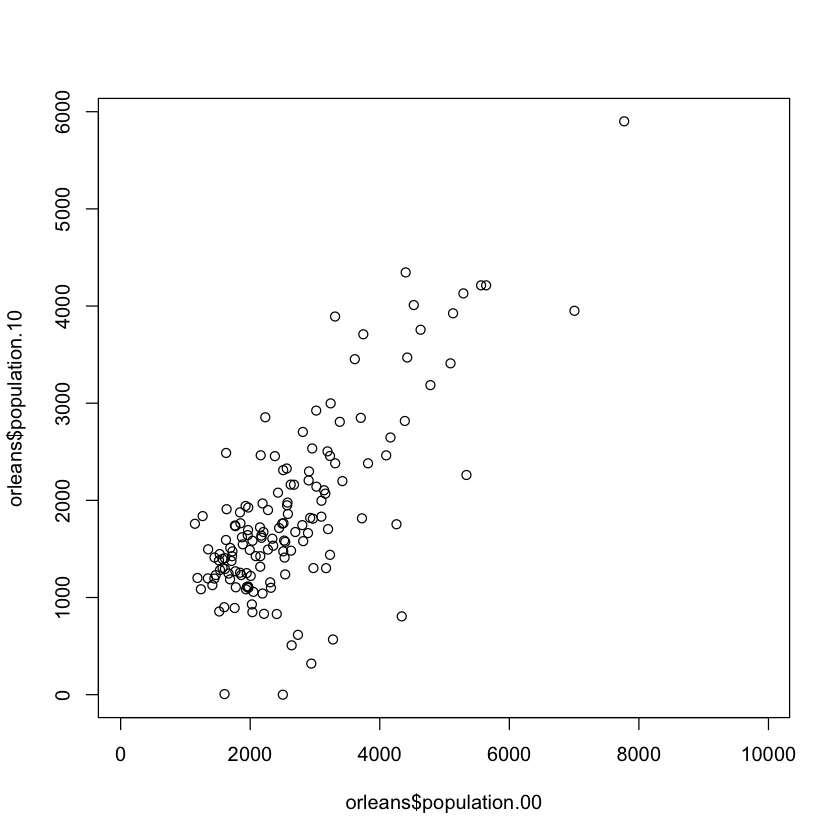

In [9]:
plot(orleans$population.00, orleans$population.10)

This doesn't tell us very much, other than the (intuitive) fact that census tracts with higher populations in 2000 also had higher populations in 2010. 

We can better examine the relationship if we draw a 45 degree line. If a census tract's population in 2010 was exactly the same as its population in 2000, it would fall on this line. If its 2010 population was lower than its 2000 population, it would fall below the line.

While we're at it, we'll add some x and y labels, and a title.

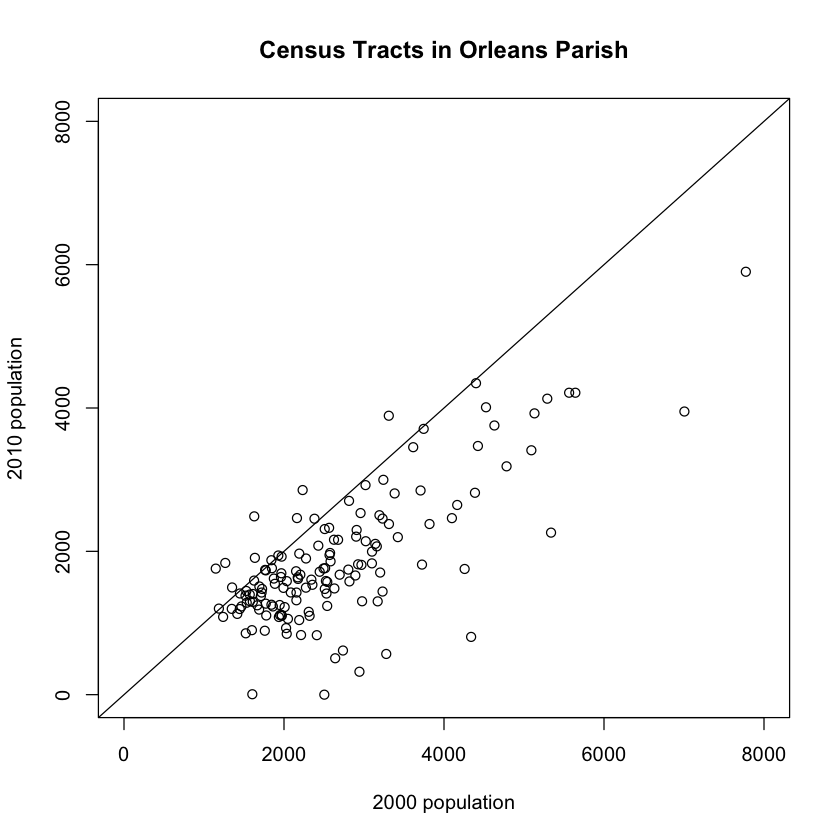

In [10]:
plot(
    orleans$population.00,
    orleans$population.10, 
    xlim = c(0, 8000), 
    ylim = c(0, 8000),
    xlab = '2000 population',
    ylab = '2010 population',
    main = 'Census Tracts in Orleans Parish'
)

abline(0, 1)

Most of the points fall below the line, indicating most census tracts saw population drops. This makes sense with our previous finding that New Orleans overall saw a 29% drop in population between 2000 and 2010.

We can further quantify this by answering the question: **How many census tracts in New Orleans had fewer people in 2010 than in 2000?**

In [29]:
orleans$pop.diff <- orleans$population.10 - orleans$population.00

In [30]:
pop.drops.orleans <- sum(orleans$pop.diff < 0, na.rm = TRUE)

In [31]:
print(paste('In New Orleans,', pop.drops.orleans, 'tracts had fewer people in 2010 than in 2000.'))

[1] "In New Orleans, 135 tracts had fewer people in 2010 than in 2000."


Let's go back to the full dataset, with all of the Louisiana parishes. We want to replicate the Times-Picayune's findings that St. Bernard lost 47% of its population compared with 2000 and that Plaquemines Parish's population fell by 14%.

Recall that our information is organized by census tract. So we'll have to aggregate it by parish in order to do these calculations. We'll use dplyr's `group_by` to group the data by parish. We'll use dplyr's `summarise_each` to add up the columns. 

Then we'll calculate the percent change between the two years:

In [19]:
parishes <- census %>% 
group_by(parish) %>%  # this tells R to group our data by parishes
summarise_each( 
    # sum all the columns 
    funs(sum(., na.rm = TRUE)),
    # except the non-numerical ones
    -fips.code, -tract, -state
) 

parishes$perc.pop.diff <- (parishes$population.10 - parishes$population.00) / parishes$population.00 * 100

head(parishes)

,parish,population.00,total.housing.units.00,occupied.housing.units.00,vacant.housing.units.00,population.10,total.housing.units.10,occupied.housing.units.10,vacant.housing.units.10,perc.pop.diff
1,Acadia Parish,58861,23209,21142,2067,61773,25387,22841,2546,4.947249
2,Allen Parish,25440,9157,8102,1055,25764,9733,8516,1217,1.273585
3,Ascension Parish,76627,29172,26691,2481,107215,40784,37790,2994,39.91804
4,Assumption Parish,23388,9635,8239,1396,23421,10351,8736,1615,0.141098
5,Avoyelles Parish,41481,16576,14736,1840,42073,18042,15432,2610,1.427159
6,Beauregard Parish,32986,14501,12104,2397,35654,15040,13159,1881,8.08828


Now we can answer the question: **Which parishes (Lousiana lingo for counties) saw the most dramatic population changes?**

We'll do this by arranging the columns by the percent change in population, using dplyr's `arrange`. To make the output easier to see, we'll only select a few of the columns.

In [32]:
parishes %>% 
select(parish, population.00, population.10, perc.pop.diff) %>% # select the columns of interest
arrange(perc.pop.diff) %>%
head()

,parish,population.00,population.10,perc.pop.diff
1,St. Bernard Parish,67229,35897,-46.60489
2,Cameron Parish,9991,6839,-31.54839
3,Orleans Parish,484674,343829,-29.05974
4,Tensas Parish,6618,5252,-20.64068
5,East Carroll Parish,9421,7759,-17.64144
6,Plaquemines Parish,26757,23042,-13.88422


**How did the occupancy of Louisiana homes change between 2000 and 2010?**

We can calculate the occupancy rate (or the percent of housing units that are occupied) in 2000 and 2010 and the percentage change between the two years:

In [42]:
parishes$perc.occupied.00 <- parishes$occupied.housing.units.00 / parishes$total.housing.units.00 * 100
parishes$perc.occupied.10 <- parishes$occupied.housing.units.10 / parishes$total.housing.units.10 * 100
parishes$perc.occupied.diff <- parishes$perc.occupied.10 - parishes$perc.occupied.00

Just as we did with population, we can answer the question, **Which parishes saw the most dramatic occupancy changes?** by arranging the data by perc.occupied.diff, our variable for the percentage point change in occupancy rates.

Note that this time, we'll arrange the data using `arrange(desc(perc.occupied.diff)` to first see the most dramatic increases in occupancy rates - parishes where occupancy rates went up the most.

In [43]:
parish.occupancy.rates <- parishes %>% 
select(parish, perc.occupied.00, perc.occupied.10, perc.occupied.diff) %>% 
arrange(desc(perc.occupied.diff)) # arrange(desc()) arranges in descending order

We can use `head` to show the first few rows of the data. We specify n = 3 to show the first 3 rows (the default is to show 6).

In [44]:
head(parish.occupancy.rates, n = 3)

,parish,perc.occupied.00,perc.occupied.10,perc.occupied.diff
1,St. Helena Parish,76.93683,84.13592,7.199093
2,Cameron Parish,67.31634,71.66713,4.350789
3,Beauregard Parish,83.47011,87.49335,4.023246


It might be more interesting for us to see parishes where the occupancy rates went *down* the most.  

We can see this using the `tail` command, which shows us the last few rows of the data (again, we specify `n = 3` to see the last 3 rows. 

In [45]:
tail(parish.occupancy.rates, n = 3)

,parish,perc.occupied.00,perc.occupied.10,perc.occupied.diff
1,Tensas Parish,71.92617,64.70063,-7.225543
2,Orleans Parish,87.52156,74.86098,-12.66058
3,St. Bernard Parish,93.77753,78.72454,-15.05298


Maybe we want to know more about the overall trends in parishes' occupancy rates. For example, did most Louisiana parishes see decreases or increases in occupancy? 

We can explore this question using a histogram of perc.occupied.diff. A histogram is a good plot for understanding the distribution of a variable. On the x-axis, it plots all the values of perc.occupied.diff (the change in occupancy over the two years) and on the y-axis, it plots how frequently these values occurred in our data.

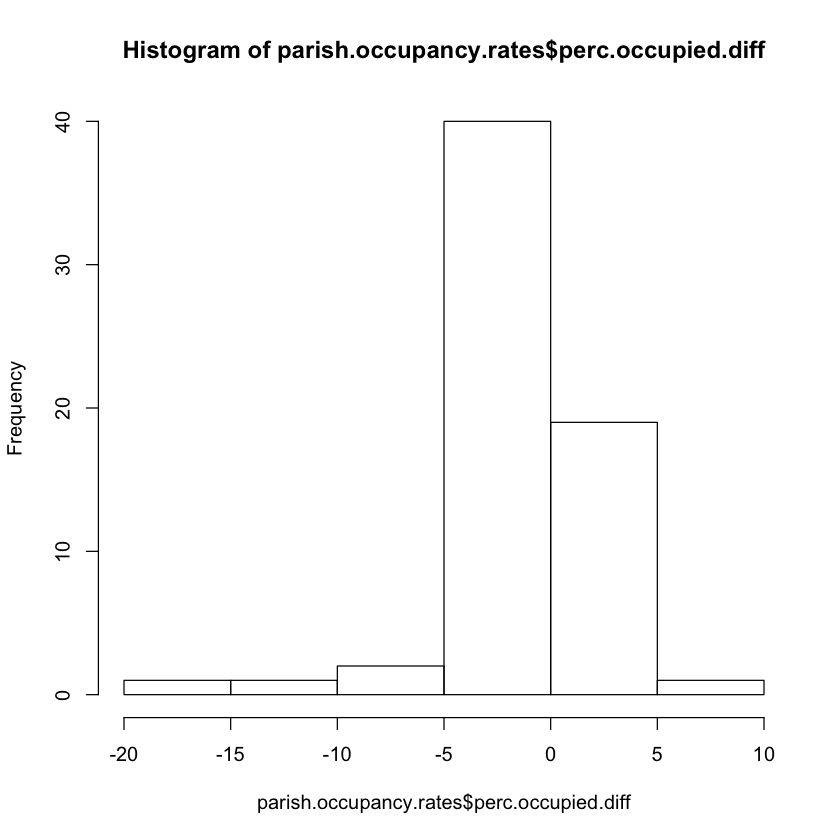

In [37]:
hist(parish.occupancy.rates$perc.occupied.diff)

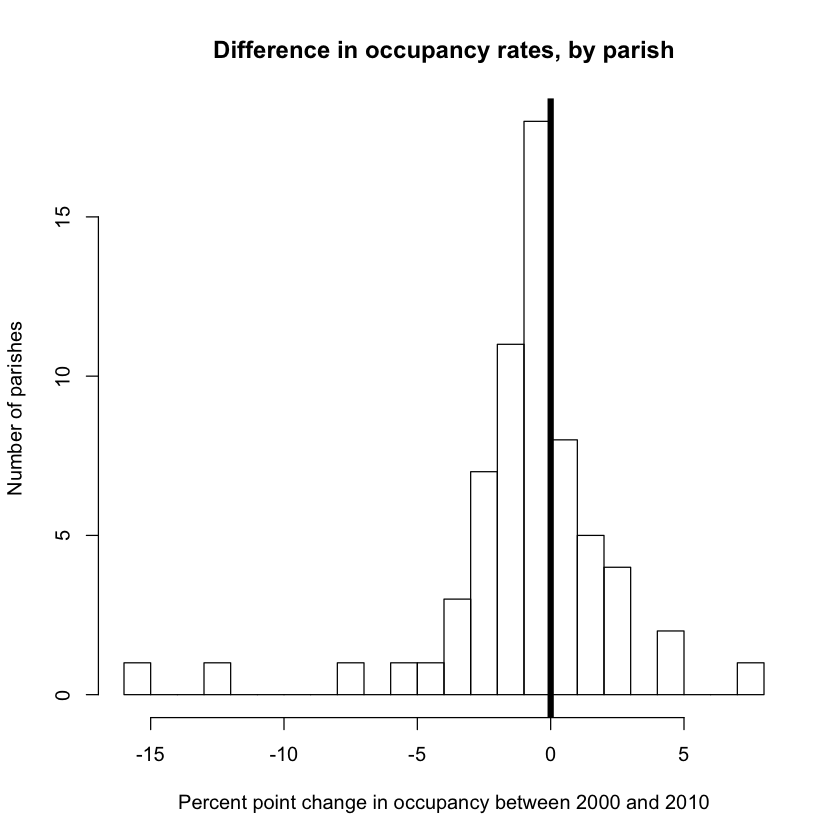

In [38]:
hist(parish.occupancy.rates$perc.occupied.diff, breaks = 20, main = 'Difference in occupancy rates, by parish',
    xlab = 'Percent point change in occupancy between 2000 and 2010', 
    ylab = 'Number of parishes'
    )
abline(v = 0, lwd = 5)

In [39]:
names(parishes)

[1] "parish"                    "population.00"            
 [3] "total.housing.units.00"    "occupied.housing.units.00"
 [5] "vacant.housing.units.00"   "population.10"            
 [7] "total.housing.units.10"    "occupied.housing.units.10"
 [9] "vacant.housing.units.10"   "perc.pop.diff"            
[11] "perc.occupied.00"          "perc.occupied.10"         
[13] "perc.occupied.diff"

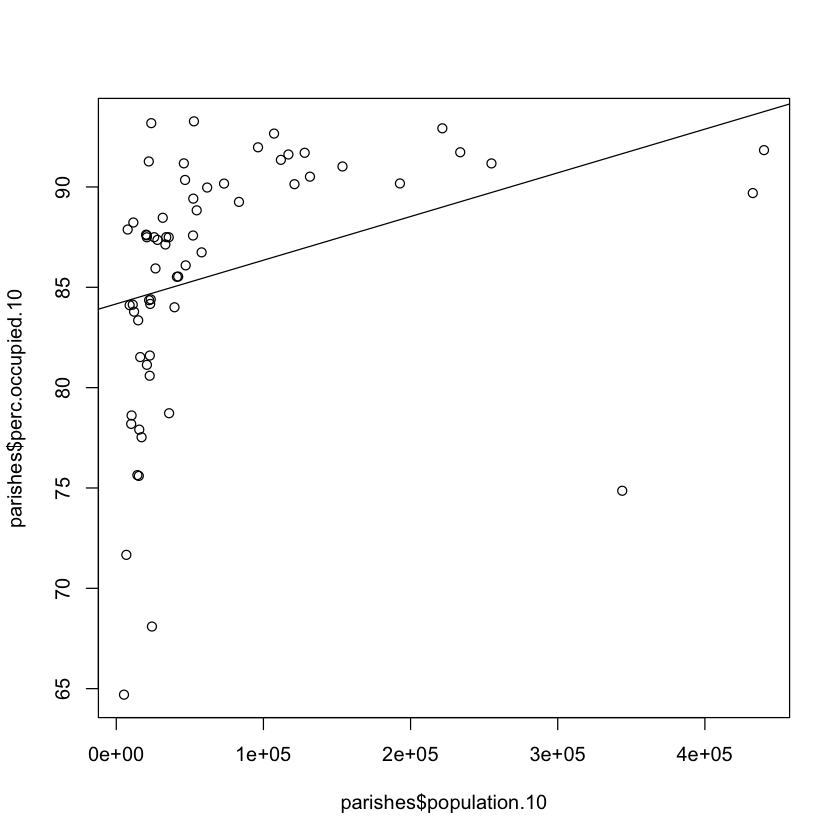

In [40]:
plot(parishes$population.10, parishes$perc.occupied.10)
abline(lm(parishes$perc.occupied.10 ~ parishes$population.10))

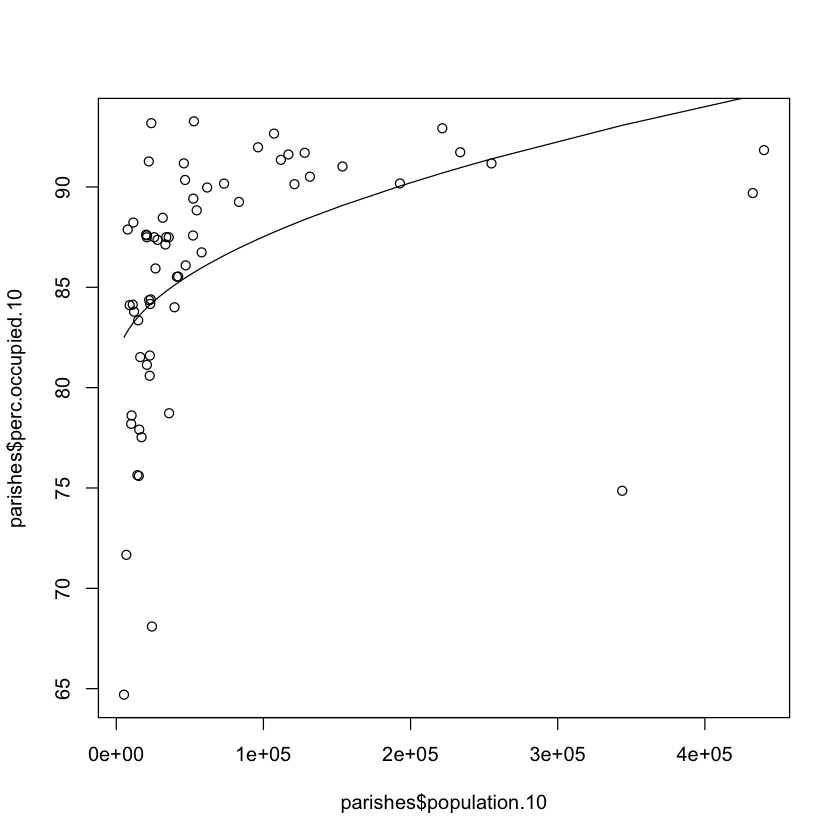

In [41]:
parishes.complete <- parishes %>% filter(is.na(population.10) == F & 
                                        is.na(perc.occupied.10) == F)


curved <- lm(parishes$perc.occupied.10 ~ sqrt(parishes$population.10))

hat <- predict(curved)

plot(parishes$population.10, parishes$perc.occupied.10)
lines(sort(parishes$population.10), sort(hat))

In [22]:
head(parishes)

,parish,population.00,total.housing.units.00,occupied.housing.units.00,vacant.housing.units.00,population.10,total.housing.units.10,occupied.housing.units.10,vacant.housing.units.10,perc.pop.diff,perc.occupied.00,perc.occupied.10,perc.occupied.diff
1,Acadia Parish,58861,23209,21142,2067,61773,25387,22841,2546,4.947249,91.09397,89.97125,-1.122727
2,Allen Parish,25440,9157,8102,1055,25764,9733,8516,1217,1.273585,88.47876,87.49615,-0.9826123
3,Ascension Parish,76627,29172,26691,2481,107215,40784,37790,2994,39.91804,91.49527,92.65889,1.163616
4,Assumption Parish,23388,9635,8239,1396,23421,10351,8736,1615,0.141098,85.51116,84.39764,-1.113514
5,Avoyelles Parish,41481,16576,14736,1840,42073,18042,15432,2610,1.427159,88.89961,85.53375,-3.365859
6,Beauregard Parish,32986,14501,12104,2397,35654,15040,13159,1881,8.08828,83.47011,87.49335,4.023246
